In [1]:
import pandas as pd

In [2]:
file = "C:/Users/akaks/Downloads/spam.csv"

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
df = pd.read_csv("C:/Users/akaks/Downloads/spam.csv",encoding='Windows-1252')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# ranaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [16]:
# Duplicate values
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

# EDA

In [19]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1e9614e6590>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

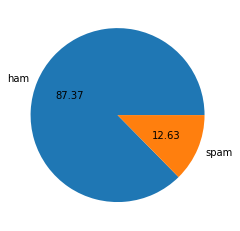

In [21]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [22]:
# data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akaks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_character'] = df['text'].apply(len)

C:\Users\akaks\AppData\Local\Temp/ipykernel_9824/2418167279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character'] = df['text'].apply(len)


In [26]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# fetch no of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\akaks\AppData\Local\Temp/ipykernel_9824/988359394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentenses'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\akaks\AppData\Local\Temp/ipykernel_9824/2040863934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentenses'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df.head()

,target,text,num_character,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df.describe()

,target,num_character,num_words,num_sentenses
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [32]:
# ham
df[df['target']==0].describe()

,target,num_character,num_words,num_sentenses
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [33]:
# spam
df[df['target']==1].describe()

,target,num_character,num_words,num_sentenses
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [34]:
import seaborn as sb

<AxesSubplot:xlabel='num_character', ylabel='Count'>

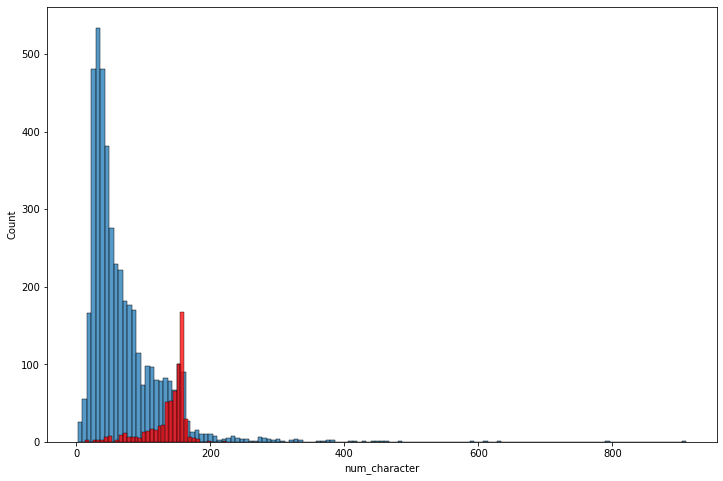

In [35]:
plt.figure(figsize=(12,8))
sb.histplot(df[df['target']==0]['num_character'])
sb.histplot(df[df['target']==1]['num_character'],color= 'r')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

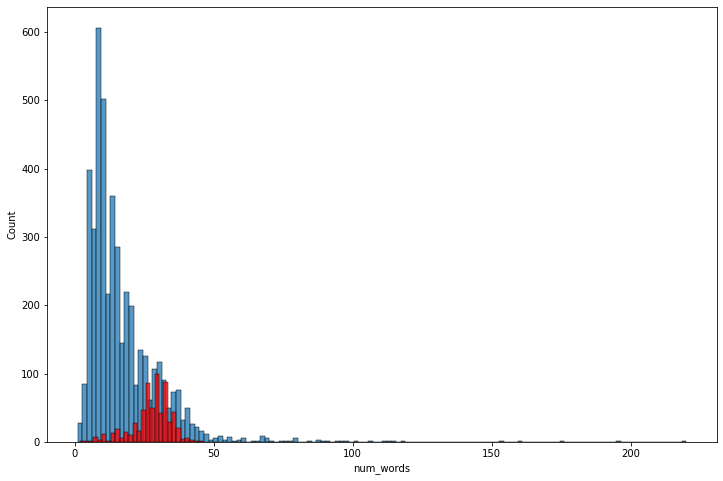

In [36]:
plt.figure(figsize=(12,8))
sb.histplot(df[df['target']==0]['num_words'])
sb.histplot(df[df['target']==1]['num_words'],color= 'r')

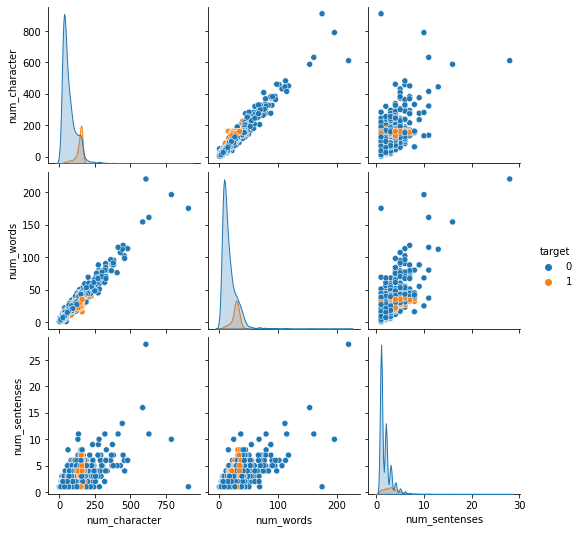

In [37]:
sb.pairplot(df,hue='target')

<AxesSubplot:>

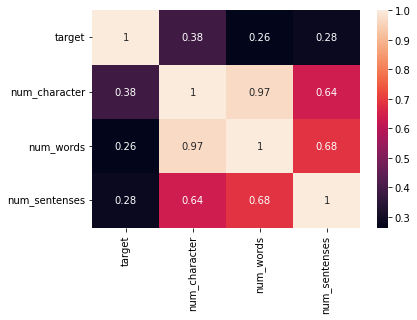

In [38]:
sb.heatmap(df.corr(),annot=True)

from above heatmap we can clearly see that the num_character & num_sentences(0.64),num_words & num_sentences(0.68) , num_words & num_character(0.97) there are highly correlated so we will keep only num_character because its correlation with target is good than other variables

# Data Preprocessing

• Lower case

• Tokenization

• Removing stopwords

• Removing special characters

• Stemming

In [39]:
df.head(2)

,target,text,num_character,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [40]:
a = df.text[0]

In [41]:
a

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [42]:
import re
import nltk

In [43]:
from nltk.corpus import stopwords
from nltk import PorterStemmer
ps = PorterStemmer()
stop_words = stopwords.words('english')

In [44]:
def text_preparation(text):
    text = text.lower()
    text = re.sub("[^A-Za-z0-9 ]","",text)
   
    y = []
    for i in text.split(" "):
        if i not in stop_words:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
df['transformed_text'] = df['text'].apply(text_preparation)

C:\Users\akaks\AppData\Local\Temp/ipykernel_9824/974430519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(text_preparation)


In [46]:
df

,target,text,num_character,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like id interest buy someth els ...


In [61]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [77]:
len(spam_corpus)

10803

C:\Users\akaks\anaconda3\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


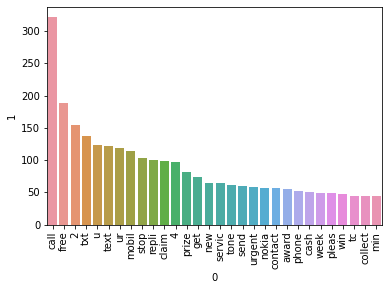

In [75]:
from collections import Counter
sb.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical');

In [70]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [76]:
len(ham_corpus)

36719

C:\Users\akaks\anaconda3\envs\Deep_Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


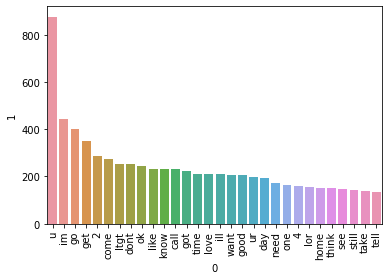

In [74]:
sb.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]);
plt.xticks(rotation='vertical');

In [80]:
# text vectorization
# using Bag of Words
df.head(3)

,target,text,num_character,num_words,num_sentenses,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


# Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [82]:
x = cv.fit_transform(df.transformed_text).toarray()

In [84]:
x.shape

(5169, 7984)

In [85]:
y = df['target'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [89]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnd = BernoulliNB()

In [93]:
gnb.fit(xtrain,ytrain)
y_pred1 = gnb.predict(xtest)
print(accuracy_score(ytest,y_pred1))
print(confusion_matrix(ytest,y_pred1))
print(precision_score(ytest,y_pred1))

0.8578336557059961
[[779 129]
 [ 18 108]]
0.45569620253164556


In [94]:
mnb.fit(xtrain,ytrain)
y_pred2 = mnb.predict(xtest)
print(accuracy_score(ytest,y_pred2))
print(confusion_matrix(ytest,y_pred2))
print(precision_score(ytest,y_pred2))

0.9748549323017408
[[895  13]
 [ 13 113]]
0.8968253968253969


In [96]:
bnd.fit(xtrain,ytrain)
y_pred3 = bnd.predict(xtest)
print(accuracy_score(ytest,y_pred3))
print(confusion_matrix(ytest,y_pred3))
print(precision_score(ytest,y_pred3))

0.960348162475822
[[905   3]
 [ 38  88]]
0.967032967032967


In [97]:
# using tfidf

In [145]:
tfidf = TfidfVectorizer(max_features=3000)

In [146]:
x1 = tfidf.fit_transform(df.transformed_text).toarray()

In [148]:
y = df['target'].values

In [147]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2,random_state=21)

In [131]:
gnb.fit(xtrain,ytrain)
y_pred1 = gnb.predict(xtest)
print(accuracy_score(ytest,y_pred1))
print(confusion_matrix(ytest,y_pred1))
print(precision_score(ytest,y_pred1))

0.851063829787234
[[776 132]
 [ 22 104]]
0.4406779661016949


In [149]:
mnb.fit(xtrain,ytrain)
y_pred2 = mnb.predict(xtest)
print(accuracy_score(ytest,y_pred2))
print(confusion_matrix(ytest,y_pred2))
print(precision_score(ytest,y_pred2))

0.9671179883945842
[[908   0]
 [ 34  92]]
1.0


In [133]:
bnd.fit(xtrain,ytrain)
y_pred3 = bnd.predict(xtest)
print(accuracy_score(ytest,y_pred3))
print(confusion_matrix(ytest,y_pred3))
print(precision_score(ytest,y_pred3))

0.9700193423597679
[[904   4]
 [ 27  99]]
0.9611650485436893


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [135]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [136]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [137]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [138]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, xtrain,ytrain,xtest,ytest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9680851063829787
Precision -  0.9603960396039604
For  KN
Accuracy -  0.9129593810444874
Precision -  1.0
For  NB
Accuracy -  0.9671179883945842
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8260869565217391
For  LR
Accuracy -  0.9390715667311412
Precision -  0.8795180722891566
For  RF
Accuracy -  0.9680851063829787
Precision -  1.0
For  AdaBoost
Accuracy -  0.9555125725338491
Precision -  0.9347826086956522
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8691588785046729
For  ETC
Accuracy -  0.9690522243713733
Precision -  0.9895833333333334
For  GBDT
Accuracy -  0.941972920696325
Precision -  0.9125
For  xgb
Accuracy -  0.9613152804642167
Precision -  0.967391304347826


In [120]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [121]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.945841,1.000000
8,ETC,0.962282,0.988764
5,RF,0.957447,0.988095
0,SVC,0.965184,0.968750
9,GBDT,0.952611,0.932584
10,xgb,0.962282,0.930693
6,AdaBoost,0.954545,0.907216
4,LR,0.936170,0.884615
3,DT,0.939072,0.870588


In [123]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [124]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.901354
1,NB,Accuracy,0.945841
2,ETC,Accuracy,0.962282
3,RF,Accuracy,0.957447
4,SVC,Accuracy,0.965184
5,GBDT,Accuracy,0.952611
6,xgb,Accuracy,0.962282
7,AdaBoost,Accuracy,0.954545
8,LR,Accuracy,0.936170
9,DT,Accuracy,0.939072


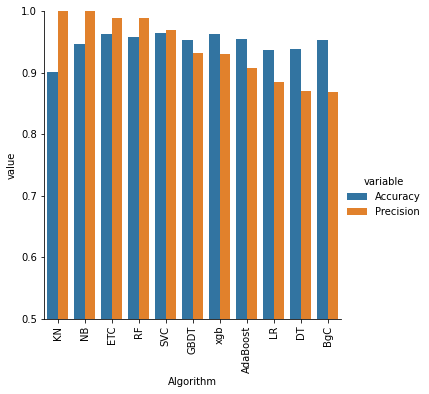

In [125]:
sb.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [139]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [140]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.912959,1.000000
2,NB,0.967118,1.000000
5,RF,0.968085,1.000000
8,ETC,0.969052,0.989583
10,xgb,0.961315,0.967391
0,SVC,0.968085,0.960396
6,AdaBoost,0.955513,0.934783
9,GBDT,0.941973,0.912500
4,LR,0.939072,0.879518
7,BgC,0.954545,0.869159


In [143]:
performance_df = performance_df.merge(temp_df,on='Algorithm')

In [144]:
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.901354,1.000000,0.912959,1.000000
1,NB,0.945841,1.000000,0.967118,1.000000
2,ETC,0.962282,0.988764,0.969052,0.989583
3,RF,0.957447,0.988095,0.968085,1.000000
4,SVC,0.965184,0.968750,0.968085,0.960396
5,GBDT,0.952611,0.932584,0.941973,0.912500
6,xgb,0.962282,0.930693,0.961315,0.967391
7,AdaBoost,0.954545,0.907216,0.955513,0.934783
8,LR,0.936170,0.884615,0.939072,0.879518
9,DT,0.939072,0.870588,0.936170,0.826087


In [150]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))